### Import Libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from time import time


import warnings
warnings.filterwarnings("ignore")

### Read CSV file and make a Pandas Dataframe

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Data.csv to Data (1).csv


In [7]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Data.csv']))
# Dataset is now stored in a Pandas Dataframe

In [8]:
data.head(5)

,Category Name,order date (DateOrders),Order Item Discount,Order Item Quantity,Sales
0,Sporting Goods,1/31/2018 22:56,13.110000,1,327.75
1,Sporting Goods,1/13/2018 12:27,16.389999,1,327.75
2,Sporting Goods,1/13/2018 12:06,18.030001,1,327.75
3,Sporting Goods,1/13/2018 11:45,22.940001,1,327.75
4,Sporting Goods,1/13/2018 11:24,29.500000,1,327.75


### Feature Extraction for working upon on Dataframe

In [9]:
filter = data['Category Name'].isin(["Indoor/Outdoor Games"])
#display the filter
filter3 = data[filter]

In [10]:
filter3.shape

(19298, 5)

In [11]:
filter3.head()

,Category Name,order date (DateOrders),Order Item Discount,Order Item Quantity,Sales
77052,Indoor/Outdoor Games,10/2/2017 11:22,1.5,3,149.940002
77053,Indoor/Outdoor Games,10/2/2017 11:22,10.0,5,249.899994
77054,Indoor/Outdoor Games,10/2/2017 11:22,3.0,3,149.940002
77055,Indoor/Outdoor Games,10/2/2017 4:22,4.5,3,149.940002
77056,Indoor/Outdoor Games,10/2/2017 4:22,10.0,4,199.919998


In [12]:
filter3 = data.loc[filter, ['order date (DateOrders)','Sales','Order Item Quantity','Order Item Discount']]
filter3.head()

,order date (DateOrders),Sales,Order Item Quantity,Order Item Discount
77052,10/2/2017 11:22,149.940002,3,1.5
77053,10/2/2017 11:22,249.899994,5,10.0
77054,10/2/2017 11:22,149.940002,3,3.0
77055,10/2/2017 4:22,149.940002,3,4.5
77056,10/2/2017 4:22,199.919998,4,10.0


### Applying to Pandas DateTime format for easy access

In [13]:
filter3['order date (DateOrders)'] =  filter3['order date (DateOrders)'].apply(pd.to_datetime)
filter3.head()

,order date (DateOrders),Sales,Order Item Quantity,Order Item Discount
77052,2017-10-02 11:22:00,149.940002,3,1.5
77053,2017-10-02 11:22:00,249.899994,5,10.0
77054,2017-10-02 11:22:00,149.940002,3,3.0
77055,2017-10-02 04:22:00,149.940002,3,4.5
77056,2017-10-02 04:22:00,199.919998,4,10.0


### Sorting the records by date and their time

In [14]:
filter3 = filter3.sort_values(by='order date (DateOrders)')
filter3.head(10)

,order date (DateOrders),Sales,Order Item Quantity,Order Item Discount
114915,2015-01-01 01:03:00,199.919998,4,39.980000
114914,2015-01-01 01:24:00,99.959999,2,16.990000
114913,2015-01-01 02:27:00,199.919998,4,35.990002
114912,2015-01-01 03:09:00,99.959999,2,15.990000
114910,2015-01-01 03:30:00,249.899994,5,22.490000
114911,2015-01-01 03:30:00,49.980000,1,8.500000
114909,2015-01-01 03:51:00,149.940002,3,17.990000
114908,2015-01-01 04:33:00,99.959999,2,14.990000
114907,2015-01-01 05:36:00,99.959999,2,12.990000
114906,2015-01-01 06:39:00,199.919998,4,33.990002


### Making column of Order date to Index

In [15]:
filter3.set_axis(filter3['order date (DateOrders)'], inplace=True)

filter3.drop(columns=['order date (DateOrders)'],inplace=True)
filter3.head()

,Sales,Order Item Quantity,Order Item Discount
order date (DateOrders),,,
2015-01-01 01:03:00,199.919998,4,39.980000
2015-01-01 01:24:00,99.959999,2,16.990000
2015-01-01 02:27:00,199.919998,4,35.990002
2015-01-01 03:09:00,99.959999,2,15.990000
2015-01-01 03:30:00,249.899994,5,22.490000


### Day-wise Aggregates

In [16]:
Item_quantity = filter3.groupby([(filter3.index.year), (filter3.index.month), (filter3.index.day)])['Order Item Quantity'].sum().astype(int)
Item_discount = filter3.groupby([(filter3.index.year), (filter3.index.month), (filter3.index.day)])['Order Item Discount'].sum().astype(int)
Item_sales = filter3.groupby([(filter3.index.year), (filter3.index.month), (filter3.index.day)])['Sales'].sum().astype(int)

In [17]:
Item_sales.head()

order date (DateOrders)  order date (DateOrders)  order date (DateOrders)
2015                     1                        1                          2948
                                                  2                          3098
                                                  3                          2698
                                                  4                          2349
                                                  5                          2898
Name: Sales, dtype: int64

### Display in single Dataframe


In [18]:
ItemSales=pd.DataFrame(Item_sales)
ItemDiscount=pd.DataFrame(Item_discount)
ItemQuantity=pd.DataFrame(Item_quantity)

In [19]:
total=ItemSales.join(ItemDiscount)


In [20]:
daily_Sales=total.join(ItemQuantity)

In [21]:
daily_Sales.head()

Sales  \
order date (DateOrders) order date (DateOrders) order date (DateOrders)          
2015                    1                       1                         2948   
                                                2                         3098   
                                                3                         2698   
                                                4                         2349   
                                                5                         2898   

                                                                         Order Item Discount  \
order date (DateOrders) order date (DateOrders) order date (DateOrders)                        
2015                    1                       1                                        381   
                                                2                                        176   
                                                3                                        331   
                                                4                                        207   
                                                5                                        340   

                                                                         Order Item Quantity  
order date (DateOrders) order date (DateOrders) order date (DateOrders)                       
2015                    1                       1                                         59  
                                                2                                         62  
                                                3                                         54  
                                                4                                         47  
                                                5                                         58

### Converting index to single column only

In [22]:
y = daily_Sales.index.get_level_values(0)
m = daily_Sales.index.get_level_values(1)
d = daily_Sales.index.get_level_values(2)

In [23]:
daily_Sales['Date'] = pd.to_datetime(y* 10000 + m * 100 + d * 1, format="%Y%m%d")
daily_Sales.set_index('Date', append=True, inplace=True)

daily_Sales=daily_Sales.droplevel(0)
daily_Sales=daily_Sales.droplevel(0)
daily_Sales=daily_Sales.droplevel(0)

In [24]:
daily_Sales.head(5)

,Sales,Order Item Discount,Order Item Quantity
Date,,,
2015-01-01,2948,381,59
2015-01-02,3098,176,62
2015-01-03,2698,331,54
2015-01-04,2349,207,47
2015-01-05,2898,340,58


### Checking the sum of Column 'Order Item Quantity'

In [25]:
Total = daily_Sales['Order Item Quantity'].sum()
print(Total)

57803


In [26]:
Indoor_Outdoor_Games_Sold = daily_Sales[["Order Item Quantity"]]
Indoor_Outdoor_Games_Sold.head()

,Order Item Quantity
Date,
2015-01-01,59
2015-01-02,62
2015-01-03,54
2015-01-04,47
2015-01-05,58


In [27]:
Indoor_Outdoor_Games_Sold.shape

(1006, 1)

# DATA PREPARATION

### FEATURE ENGINEERING 

Attempt to create the lagged features with 'k'

In [28]:
#DailyItemQuantity = Indoor_Outdoor_Games_Sold['Order Item Quantity'].tolist()
#print(DailyItemQuantity)

In [29]:
#number_lags = 89
#df = pd.DataFrame(data={'Order_Item_Quantity':[59, 62, 54, 47, 58, 79, 63, 41, 39, 57, 54, 85, 73, 62, 69, 63, 51, 48, 75, 72, 77, 64, 58, 55, 63, 88, 59, 48, 59, 68, 42, 24, 56, 95, 58, 67, 58, 58, 36, 79, 53, 25, 49, 55, 47, 77, 81, 55, 44, 66, 53, 51, 66, 66, 49, 70, 59, 57, 35, 72, 51, 35, 59, 59, 67, 81, 65, 56, 40, 43, 82, 40, 86, 51, 49, 57, 64, 97, 53, 75, 47, 63, 65, 74, 86, 66, 54, 43, 82, 63, 63, 67, 73, 34, 70, 35, 53, 51, 65, 50, 69, 56, 72, 57, 72, 63, 58, 48, 63, 73, 37, 48, 35, 67, 84, 78, 48, 55, 65, 56, 34, 60, 41, 40, 79, 53, 74, 65, 44, 53, 82, 50, 45, 58, 58, 66, 51, 59, 58, 38, 66, 80, 49, 29, 44, 46, 45, 65, 57, 42, 81, 67, 53, 57, 76, 46, 48, 62, 74, 51, 42, 35, 55, 37, 63, 77, 58, 62, 69, 65, 61, 60, 42, 54, 21, 46, 56, 61, 46, 89, 68, 69, 68, 67, 51, 76, 64, 59, 43, 69, 56, 68, 51, 54, 60, 74, 42, 45, 58, 58, 48, 72, 45, 85, 40, 65, 67, 79, 67, 36, 54, 45, 56, 49, 70, 67, 55, 52, 63, 53, 44, 45, 57, 70, 32, 37, 28, 53, 69, 39, 28, 38, 55, 56, 21, 26, 79, 79, 43, 22, 64, 60, 56, 74, 46, 56, 68, 45, 64, 53, 51, 43, 65, 49, 62, 73, 74, 62, 90, 64, 78, 62, 94, 50, 79, 49, 39, 45, 58, 50, 54, 26, 70, 75, 51, 76, 72, 68, 72, 23, 68, 41, 50, 74, 33, 78, 27, 60, 48, 55, 60, 57, 74, 68, 50, 68, 69, 61, 49, 71, 62, 38, 48, 57, 78, 48, 50, 86, 66, 53, 38, 69, 48, 56, 70, 76, 81, 69, 45, 56, 68, 36, 67, 65, 62, 56, 80, 47, 54, 72, 66, 55, 41, 31, 60, 73, 53, 40, 35, 50, 62, 52, 53, 54, 60, 55, 44, 42, 85, 77, 45, 61, 88, 64, 44, 47, 73, 88, 95, 44, 58, 77, 54, 78, 45, 38, 83, 51, 30, 56, 46, 64, 77, 39, 70, 72, 59, 48, 54, 59, 66, 67, 55, 64, 43, 61, 50, 60, 60, 77, 75, 62, 56, 59, 70, 59, 33, 72, 59, 57, 84, 57, 77, 57, 68, 64, 86, 53, 73, 65, 61, 66, 91, 70, 59, 29, 54, 59, 61, 67, 44, 84, 46, 37, 47, 50, 55, 52, 50, 79, 61, 51, 51, 49, 41, 76, 68, 56, 66, 56, 40, 50, 40, 52, 47, 62, 34, 68, 52, 45, 49, 56, 40, 56, 47, 70, 64, 35, 51, 37, 62, 40, 53, 51, 40, 64, 71, 78, 57, 45, 60, 46, 60, 58, 73, 82, 50, 60, 72, 51, 47, 63, 34, 51, 36, 57, 77, 45, 47, 47, 59, 54, 61, 72, 76, 35, 57, 44, 38, 84, 73, 73, 26, 49, 44, 65, 76, 58, 61, 77, 34, 49, 61, 66, 71, 45, 46, 64, 49, 71, 96, 39, 60, 51, 26, 49, 55, 53, 48, 64, 80, 22, 54, 55, 38, 29, 60, 60, 32, 63, 54, 43, 42, 75, 53, 51, 49, 68, 61, 72, 37, 85, 45, 43, 46, 57, 65, 49, 66, 50, 75, 35, 96, 68, 67, 56, 45, 61, 70, 58, 45, 49, 43, 67, 59, 58, 62, 47, 69, 39, 63, 53, 64, 58, 68, 38, 37, 43, 57, 53, 43, 39, 55, 28, 64, 65, 52, 72, 75, 60, 44, 32, 62, 47, 49, 34, 43, 44, 55, 53, 63, 58, 50, 61, 54, 54, 56, 63, 23, 38, 75, 45, 67, 76, 67, 59, 100, 59, 51, 61, 53, 31, 51, 62, 54, 61, 63, 68, 65, 67, 60, 68, 84, 50, 61, 59, 60, 44, 73, 82, 58, 79, 89, 73, 64, 55, 38, 74, 74, 70, 70, 62, 69, 49, 40, 80, 61, 63, 69, 50, 60, 57, 93, 57, 50, 38, 48, 44, 66, 48, 34, 90, 65, 37, 63, 63, 116, 29, 47, 74, 55, 56, 53, 57, 77, 56, 77, 33, 67, 49, 48, 55, 53, 52, 67, 54, 64, 66, 64, 51, 77, 59, 36, 70, 48, 68, 72, 58, 17, 52, 83, 64, 74, 65, 62, 49, 69, 81, 60, 63, 59, 42, 31, 68, 42, 57, 46, 56, 72, 45, 54, 69, 73, 63, 66, 23, 45, 55, 107, 44, 50, 44, 43, 65, 68, 43, 62, 87, 68, 59, 56, 68, 72, 59, 70, 65, 59, 88, 60, 57, 43, 59, 48, 84, 83, 44, 63, 45, 59, 70, 67, 60, 69, 64, 94, 68, 59, 56, 42, 57, 42, 16, 64, 31, 48, 81, 50, 43, 51, 70, 67, 73, 26, 63, 66, 68, 69, 48, 73, 54, 57, 57, 77, 43, 44, 26, 37, 68, 74, 77, 57, 61, 58, 83, 72, 86, 32, 59, 31, 59, 47, 92, 66, 51, 56, 60, 63, 50, 46, 59, 43, 74, 58, 64, 56, 84, 58, 57, 54, 79, 78, 44, 72, 57, 67, 60, 56, 78, 58, 61, 55, 47, 36, 55, 61, 52, 61, 47, 43, 68, 46, 49, 109, 59, 65, 71, 29, 52, 28, 55, 85, 49, 104, 36, 51, 56, 38, 58, 42, 60, 34, 51, 82, 74, 51, 56, 41, 30, 69, 35, 34, 33, 55, 66, 54, 47, 52, 54, 43, 34, 72, 40, 47, 88, 23, 67, 66, 55, 52, 78, 59, 38, 71, 62, 59, 41, 91, 47, 54, 24, 47, 79, 58, 47, 72, 46, 46, 41, 62, 61, 52, 56, 47, 38, 57, 36, 95, 50, 60, 40, 49, 77, 53, 56, 51, 52, 53, 69, 48, 41, 62, 43, 40, 47, 56, 71, 59, 40, 81, 39, 56, 63, 68, 49, 54, 83, 75, 53, 52, 51, 47, 26, 25, 47, 48, 56, 35, 68, 58, 51, 46, 59, 68, 68, 45, 64, 47, 56, 57, 44, 54, 67, 27, 78, 45, 23]})
#for lag in range(1, number_lags + 1):
#    df['lag_' + str(lag)] = df.Order_Item_Quantity.shift(lag)

#df.head()

Considering the prior 90 days sales to predict the number of items sold for the month of April_2015 till Sept_2017

In [30]:
April_2015 = Indoor_Outdoor_Games_Sold.iloc[1:90]
May_2015 = Indoor_Outdoor_Games_Sold.iloc[31:120]
June_2015 = Indoor_Outdoor_Games_Sold.iloc[62:151]
July_2015 = Indoor_Outdoor_Games_Sold.iloc[92:181]
August_2015 = Indoor_Outdoor_Games_Sold.iloc[123:212]
Sept_2015 = Indoor_Outdoor_Games_Sold.iloc[154:243]
Oct_2015 = Indoor_Outdoor_Games_Sold.iloc[184:273]
Nov_2015 = Indoor_Outdoor_Games_Sold.iloc[215:304]
Dec_2015 = Indoor_Outdoor_Games_Sold.iloc[245:334]
Jan_2016 = Indoor_Outdoor_Games_Sold.iloc[276:365]
Feb_2016 = Indoor_Outdoor_Games_Sold.iloc[307:396]
March_2016 = Indoor_Outdoor_Games_Sold.iloc[336:425]
April_2016 = Indoor_Outdoor_Games_Sold.iloc[367:456]
May_2016 = Indoor_Outdoor_Games_Sold.iloc[397:486]
June_2016 = Indoor_Outdoor_Games_Sold.iloc[428:517]
July_2016 = Indoor_Outdoor_Games_Sold.iloc[458:547]
August_2016 = Indoor_Outdoor_Games_Sold.iloc[489:578]
Sept_2016 = Indoor_Outdoor_Games_Sold.iloc[520:609]
Oct_2016 = Indoor_Outdoor_Games_Sold.iloc[550:639]
Nov_2016 = Indoor_Outdoor_Games_Sold.iloc[581:670]
Dec_2016 = Indoor_Outdoor_Games_Sold.iloc[611:700]
Jan_2017 = Indoor_Outdoor_Games_Sold.iloc[642:731]
Feb_2017 = Indoor_Outdoor_Games_Sold.iloc[673:762]
March_2017 = Indoor_Outdoor_Games_Sold.iloc[701:790]
April_2017 = Indoor_Outdoor_Games_Sold.iloc[732:821]
May_2017 = Indoor_Outdoor_Games_Sold.iloc[762:851]
June_2017 = Indoor_Outdoor_Games_Sold.iloc[793:882]
July_2017 = Indoor_Outdoor_Games_Sold.iloc[823:912]
August_2017 = Indoor_Outdoor_Games_Sold.iloc[854:943]
Sept_2017 = Indoor_Outdoor_Games_Sold.iloc[885:974]

In [31]:
Sept_2017.tail()

,Order Item Quantity
Date,
2017-08-27,39
2017-08-28,56
2017-08-29,63
2017-08-30,68
2017-08-31,49


### Taking Transpose to convert 90 days sales as Single row/record for each month to be predicted

In [32]:
Row_1 = pd.DataFrame(April_2015.to_numpy().T).add_prefix('Day')
Row_2 = pd.DataFrame(May_2015.to_numpy().T).add_prefix('Day')
Row_3 = pd.DataFrame(June_2015.to_numpy().T).add_prefix('Day')
Row_4 = pd.DataFrame(July_2015.to_numpy().T).add_prefix('Day')
Row_5 = pd.DataFrame(August_2015.to_numpy().T).add_prefix('Day')
Row_6 = pd.DataFrame(Sept_2015.to_numpy().T).add_prefix('Day')
Row_7 = pd.DataFrame(Oct_2015.to_numpy().T).add_prefix('Day')
Row_8 = pd.DataFrame(Nov_2015.to_numpy().T).add_prefix('Day')
Row_9 = pd.DataFrame(Dec_2015.to_numpy().T).add_prefix('Day')
Row_10 = pd.DataFrame(Jan_2016.to_numpy().T).add_prefix('Day')
Row_11 = pd.DataFrame(Feb_2016.to_numpy().T).add_prefix('Day')
Row_12 = pd.DataFrame(March_2016.to_numpy().T).add_prefix('Day')
Row_13 = pd.DataFrame(April_2016.to_numpy().T).add_prefix('Day')
Row_14 = pd.DataFrame(May_2016.to_numpy().T).add_prefix('Day')
Row_15 = pd.DataFrame(June_2016.to_numpy().T).add_prefix('Day')
Row_16 = pd.DataFrame(July_2016.to_numpy().T).add_prefix('Day')
Row_17 = pd.DataFrame(August_2016.to_numpy().T).add_prefix('Day')
Row_18 = pd.DataFrame(Sept_2016.to_numpy().T).add_prefix('Day')
Row_19 = pd.DataFrame(Oct_2016.to_numpy().T).add_prefix('Day')
Row_20 = pd.DataFrame(Nov_2016.to_numpy().T).add_prefix('Day')
Row_21 = pd.DataFrame(Dec_2016.to_numpy().T).add_prefix('Day')
Row_22 = pd.DataFrame(Jan_2017.to_numpy().T).add_prefix('Day')
Row_23 = pd.DataFrame(Feb_2017.to_numpy().T).add_prefix('Day')
Row_24 = pd.DataFrame(March_2017.to_numpy().T).add_prefix('Day')
Row_25 = pd.DataFrame(April_2017.to_numpy().T).add_prefix('Day')
Row_26 = pd.DataFrame(May_2017.to_numpy().T).add_prefix('Day')
Row_27 = pd.DataFrame(June_2017.to_numpy().T).add_prefix('Day')
Row_28 = pd.DataFrame(July_2017.to_numpy().T).add_prefix('Day')
Row_29 = pd.DataFrame(August_2017.to_numpy().T).add_prefix('Day')
Row_30 = pd.DataFrame(Sept_2017.to_numpy().T).add_prefix('Day')

In [33]:
Row_30

,Day0,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,...,Day79,Day80,Day81,Day82,Day83,Day84,Day85,Day86,Day87,Day88
0,56,38,58,42,60,34,51,82,74,51,...,56,71,59,40,81,39,56,63,68,49


### Merging all Rows to prepare the DataFrame


In [34]:
merge2=Row_1.append(Row_2,ignore_index=True)
merge3=merge2.append(Row_3,ignore_index=True)
merge4=merge3.append(Row_4,ignore_index=True)
merge5=merge4.append(Row_5,ignore_index=True)
merge6=merge5.append(Row_6,ignore_index=True)
merge7=merge6.append(Row_7,ignore_index=True)
merge8=merge7.append(Row_8,ignore_index=True)
merge9=merge8.append(Row_9,ignore_index=True)
merge10=merge9.append(Row_10,ignore_index=True)
merge11=merge10.append(Row_11,ignore_index=True)
merge12=merge11.append(Row_12,ignore_index=True)
merge13=merge12.append(Row_13,ignore_index=True)
merge14=merge13.append(Row_14,ignore_index=True)
merge15=merge14.append(Row_15,ignore_index=True)
merge16=merge15.append(Row_16,ignore_index=True)
merge17=merge16.append(Row_17,ignore_index=True)
merge18=merge17.append(Row_18,ignore_index=True)
merge19=merge18.append(Row_19,ignore_index=True)
merge20=merge19.append(Row_20,ignore_index=True)
merge21=merge20.append(Row_21,ignore_index=True)
merge22=merge21.append(Row_22,ignore_index=True)
merge23=merge22.append(Row_23,ignore_index=True)
merge24=merge23.append(Row_24,ignore_index=True)
merge25=merge24.append(Row_25,ignore_index=True)
merge26=merge25.append(Row_26,ignore_index=True)
merge27=merge26.append(Row_27,ignore_index=True)
merge28=merge27.append(Row_28,ignore_index=True)
merge29=merge28.append(Row_29,ignore_index=True)
merge30=merge29.append(Row_30,ignore_index=True)

In [35]:
merge30

,Day0,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,...,Day79,Day80,Day81,Day82,Day83,Day84,Day85,Day86,Day87,Day88
0,62,54,47,58,79,63,41,39,57,54,...,47,63,65,74,86,66,54,43,82,63
1,24,56,95,58,67,58,58,36,79,53,...,37,48,35,67,84,78,48,55,65,56
2,59,59,67,81,65,56,40,43,82,40,...,80,49,29,44,46,45,65,57,42,81
3,73,34,70,35,53,51,65,50,69,56,...,60,42,54,21,46,56,61,46,89,68
4,40,79,53,74,65,44,53,82,50,45,...,45,85,40,65,67,79,67,36,54,45
5,76,46,48,62,74,51,42,35,55,37,...,56,21,26,79,79,43,22,64,60,56
6,51,76,64,59,43,69,56,68,51,54,...,50,79,49,39,45,58,50,54,26,70
7,67,55,52,63,53,44,45,57,70,32,...,50,68,69,61,49,71,62,38,48,57
8,56,68,45,64,53,51,43,65,49,62,...,62,56,80,47,54,72,66,55,41,31
9,72,68,72,23,68,41,50,74,33,78,...,47,73,88,95,44,58,77,54,78,45


### Month-wise Aggregated values from April_2015 till Sept_2017


In [36]:
monthlyquantity = daily_Sales.groupby([(daily_Sales.index.year), (daily_Sales.index.month)])['Order Item Quantity'].sum().astype(int)
monthlydiscount = daily_Sales.groupby([(daily_Sales.index.year), (daily_Sales.index.month)])['Order Item Discount'].sum().astype(int)

### Convert into a dataframe

In [37]:
Monthly_Quantity=pd.DataFrame(monthlyquantity)
Monthly_Discount=pd.DataFrame(monthlydiscount)

In [38]:
a = Monthly_Quantity.index.get_level_values(0)
b = Monthly_Quantity.index.get_level_values(1)
c = Monthly_Discount.index.get_level_values(0)
e = Monthly_Discount.index.get_level_values(1)

In [39]:
Monthly_Quantity['Index'] = pd.to_datetime(a* 10000 + b * 100 + 1, format="%Y%m%d")
Monthly_Discount['Index'] = pd.to_datetime(c* 10000 + e * 100 + 1, format="%Y%m%d")

Monthly_Quantity.set_index('Index', append=True, inplace=True)
Monthly_Discount.set_index('Index', append=True, inplace=True)

Monthly_Quantity=Monthly_Quantity.droplevel(0)
Monthly_Quantity=Monthly_Quantity.droplevel(0)
Monthly_Discount=Monthly_Discount.droplevel(0)
Monthly_Discount=Monthly_Discount.droplevel(0)

In [40]:
Monthly_Quantity.tail()

,Order Item Quantity
Index,
2017-06-01,1552
2017-07-01,1736
2017-08-01,1699
2017-09-01,1609
2017-10-01,68


In [41]:
Monthly_Quantity.shape

(34, 1)

### Slicing and Selecting monthly Items sold from April_2015 till Sept_2017

In [42]:
MonthlyDiscount = Monthly_Discount.iloc[3:33]
MonthlyQuantity = Monthly_Quantity.iloc[3:33]

In [43]:
MonthlyQuantity.shape

(30, 1)

### List down the values of monthly Item Quantity sold from April_2015 till Sept_2017

In [44]:
MonthlyItemQuantity = MonthlyQuantity['Order Item Quantity'].tolist()
MonthlyItemDiscount = MonthlyDiscount['Order Item Discount'].tolist()
print(MonthlyItemQuantity)
print(MonthlyItemDiscount)

[1765, 1712, 1701, 1835, 1566, 1793, 1803, 1789, 1856, 1830, 1780, 1669, 1648, 1770, 1585, 1805, 1605, 1741, 1995, 1759, 1860, 1771, 1764, 1720, 1836, 1775, 1552, 1736, 1699, 1609]
[8827, 8682, 8561, 9383, 7876, 9217, 9016, 9103, 9257, 9247, 9035, 8341, 8444, 8883, 8073, 9212, 8055, 8750, 10079, 8855, 9333, 8967, 8896, 8662, 9403, 8864, 7870, 8806, 8698, 8118]


### Create copy of the dataset


In [45]:
df1 = merge30.copy()

In [46]:
df1

,Day0,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,...,Day79,Day80,Day81,Day82,Day83,Day84,Day85,Day86,Day87,Day88
0,62,54,47,58,79,63,41,39,57,54,...,47,63,65,74,86,66,54,43,82,63
1,24,56,95,58,67,58,58,36,79,53,...,37,48,35,67,84,78,48,55,65,56
2,59,59,67,81,65,56,40,43,82,40,...,80,49,29,44,46,45,65,57,42,81
3,73,34,70,35,53,51,65,50,69,56,...,60,42,54,21,46,56,61,46,89,68
4,40,79,53,74,65,44,53,82,50,45,...,45,85,40,65,67,79,67,36,54,45
5,76,46,48,62,74,51,42,35,55,37,...,56,21,26,79,79,43,22,64,60,56
6,51,76,64,59,43,69,56,68,51,54,...,50,79,49,39,45,58,50,54,26,70
7,67,55,52,63,53,44,45,57,70,32,...,50,68,69,61,49,71,62,38,48,57
8,56,68,45,64,53,51,43,65,49,62,...,62,56,80,47,54,72,66,55,41,31
9,72,68,72,23,68,41,50,74,33,78,...,47,73,88,95,44,58,77,54,78,45


### Adding the Target variable to the dataframe

In [47]:
df1.insert(loc=89, column='Order Item Quantity', value=MonthlyItemQuantity)

In [48]:
df1

,Day0,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,...,Day80,Day81,Day82,Day83,Day84,Day85,Day86,Day87,Day88,Order Item Quantity
0,62,54,47,58,79,63,41,39,57,54,...,63,65,74,86,66,54,43,82,63,1765
1,24,56,95,58,67,58,58,36,79,53,...,48,35,67,84,78,48,55,65,56,1712
2,59,59,67,81,65,56,40,43,82,40,...,49,29,44,46,45,65,57,42,81,1701
3,73,34,70,35,53,51,65,50,69,56,...,42,54,21,46,56,61,46,89,68,1835
4,40,79,53,74,65,44,53,82,50,45,...,85,40,65,67,79,67,36,54,45,1566
5,76,46,48,62,74,51,42,35,55,37,...,21,26,79,79,43,22,64,60,56,1793
6,51,76,64,59,43,69,56,68,51,54,...,79,49,39,45,58,50,54,26,70,1803
7,67,55,52,63,53,44,45,57,70,32,...,68,69,61,49,71,62,38,48,57,1789
8,56,68,45,64,53,51,43,65,49,62,...,56,80,47,54,72,66,55,41,31,1856
9,72,68,72,23,68,41,50,74,33,78,...,73,88,95,44,58,77,54,78,45,1830


### Segregating Features and Target Variable

In [49]:
Y = df1["Order Item Quantity"]
X = df1.drop(columns=["Order Item Quantity"])

# Fitting the Model

## XgBoost Regressor
    VARIATION-I [FEATURES : Previous 90 Days Sales]

Previous 89 days Items Sold data is used as features to predict the Items Sold in the next month.

### Train Test Split

In [50]:
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(df1, test_size=0.2, shuffle=True, random_state=0)
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 24
No. of testing examples: 6


In [51]:
x_train, y_train = training_data.drop("Order Item Quantity", axis=1), training_data['Order Item Quantity']
x_test, y_test   = testing_data.drop("Order Item Quantity", axis=1) , testing_data['Order Item Quantity']

In [52]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
model = xgb.XGBRegressor(n_estimators=1000)
model.fit(x_train, y_train)

[21:32:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1000)

In [53]:
preds = pd.DataFrame(model.predict(x_test))

### Evaluation Metric

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [55]:
print("\tMean absolute error (MAE):", mean_absolute_error(y_test, preds))
print("\tRoot Mean squared error (RMSE):",  np.sqrt(mean_squared_error(y_test, preds)))

	Mean absolute error (MAE): 91.25669352213542
	Root Mean squared error (RMSE): 117.40493620737624


In [56]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, preds)*100

5.451243844706678

In [57]:
print(y_test)

print(preds)

2     1701
28    1699
13    1770
10    1780
26    1552
24    1836
Name: Order Item Quantity, dtype: int64
             0
0  1731.802979
1  1747.930176
2  1661.601196
3  1770.732422
4  1782.860596
5  1716.719971


## K-fold Cross Validation

In [58]:
#import necessary libraries

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from numpy import mean
from numpy import absolute
from numpy import sqrt

We’ll fit a XGBOOST model to the dataset and perform k-fold cross validation to evaluate the model performance.

In [59]:
#define cross-validation method to use

cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build xtreme gradient boosting model
xgboost = xgb.XGBRegressor() 


### Model Evaluation

In [60]:
#use k-fold CV to evaluate model
score1 = cross_val_score(xgboost, X, Y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
#view mean absolute errors
score1


array([ -65.90087891, -127.37438965, -163.19047038,  -71.63427734,
        -85.86901855, -159.79097493, -122.15852865,  -97.38566081,
       -126.68815104,  -79.12768555])

In [61]:
print("\tMean absolute error (MAE):", mean(absolute(score1)))

	Mean absolute error (MAE): 109.91200358072915


In [62]:
score2 = cross_val_score(xgboost, X, Y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("\tRoot Mean squared error (RMSE):", sqrt(mean(absolute(score2))))

	Root Mean squared error (RMSE): 132.92481989358149


#### Calculating Mean Absolute Percentage Error with custom function¶

In [63]:
from sklearn.metrics import make_scorer

#define custom function which returns single output as metric score
def MAPE(y_true, y_pred): 
    return 1 - np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#make scorer from custome function
mape_scorer = make_scorer(MAPE)

#cross validation score on model

score3 = cross_val_score(xgboost, X, Y, scoring=mape_scorer, cv=cv)
score3

[21:32:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

array([-2.72911504, -6.56193229, -8.64221802, -3.54106207, -3.84592145,
       -7.26880549, -6.34398733, -4.74229325, -5.99577472, -3.71675503])

In [64]:
print("\t Mean Absolute Percentage error (MAPE):", mean(absolute(score3)))

	 Mean Absolute Percentage error (MAPE): 5.338786466654123


### Predicted Values

In [65]:
predictions = cross_val_predict(xgboost, X,Y, cv=cv)
print(predictions)

[21:32:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

## XgBoost Regressor
    VARIATION-II [FEATURES : Previous 90 Days Sales + Monthly Item Discount]

In [66]:
df2 = df1.copy()

In [67]:
df2.head()

,Day0,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,...,Day80,Day81,Day82,Day83,Day84,Day85,Day86,Day87,Day88,Order Item Quantity
0,62,54,47,58,79,63,41,39,57,54,...,63,65,74,86,66,54,43,82,63,1765
1,24,56,95,58,67,58,58,36,79,53,...,48,35,67,84,78,48,55,65,56,1712
2,59,59,67,81,65,56,40,43,82,40,...,49,29,44,46,45,65,57,42,81,1701
3,73,34,70,35,53,51,65,50,69,56,...,42,54,21,46,56,61,46,89,68,1835
4,40,79,53,74,65,44,53,82,50,45,...,85,40,65,67,79,67,36,54,45,1566


### Adding a Regressor variable to the dataframe

In [68]:
df2.insert(loc=90, column='Order Item Discount', value=MonthlyItemDiscount)

In [69]:
Y1 = df2["Order Item Quantity"]
X1 = df2.drop(columns=["Order Item Quantity"])

In [70]:
df2.head()

,Day0,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,...,Day81,Day82,Day83,Day84,Day85,Day86,Day87,Day88,Order Item Quantity,Order Item Discount
0,62,54,47,58,79,63,41,39,57,54,...,65,74,86,66,54,43,82,63,1765,8827
1,24,56,95,58,67,58,58,36,79,53,...,35,67,84,78,48,55,65,56,1712,8682
2,59,59,67,81,65,56,40,43,82,40,...,29,44,46,45,65,57,42,81,1701,8561
3,73,34,70,35,53,51,65,50,69,56,...,54,21,46,56,61,46,89,68,1835,9383
4,40,79,53,74,65,44,53,82,50,45,...,40,65,67,79,67,36,54,45,1566,7876


In [71]:
training_data, testing_data = train_test_split(df2, test_size=0.2, shuffle=False, random_state=1)
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 24
No. of testing examples: 6


In [72]:

x_train, y_train = training_data.drop("Order Item Quantity", axis=1), training_data['Order Item Quantity']
x_test, y_test   = testing_data.drop("Order Item Quantity", axis=1) , testing_data['Order Item Quantity']

# XGBOOST PREDICTION

In [73]:
xgboost.fit(x_train, y_train)

[21:32:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [74]:
Row25 = x_test.head(1)
Actual_value2 = y_test.head(1)

In [75]:

xgboost_prediction2 = pd.DataFrame(xgboost.predict(Row25))
print(xgboost_prediction2)
print(Actual_value2)

             0
0  1842.439331
24    1836
Name: Order Item Quantity, dtype: int64


In [76]:
print("\tMean absolute error (MAE):", mean_absolute_error(Actual_value2, xgboost_prediction2))

	Mean absolute error (MAE): 6.4393310546875


###Model Fitting and Model Evaluation


In [77]:
#build xtreme gradient boosting model
xgboost = xgb.XGBRegressor() 

In [78]:
#use k-fold CV to evaluate model
score1 = cross_val_score(xgboost, X1, Y1, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("\tMean absolute error (MAE):", mean(absolute(score1)))


	Mean absolute error (MAE): 28.69781494140625


In [79]:
score2 = cross_val_score(xgboost, X1, Y1, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("\tRoot Mean squared error (RMSE):", sqrt(mean(absolute(score2))))

	Root Mean squared error (RMSE): 40.10728374070712


In [80]:
from sklearn.metrics import make_scorer

#define custom function which returns single output as metric score
def MAPE(y_true, y_pred): 
    return 1 - np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#make scorer from custome function
mape_scorer = make_scorer(MAPE)

#cross validation score on model

score3 = cross_val_score(xgboost, X1, Y1, scoring=mape_scorer, cv=cv)
print("\t Mean Absolute Percentage error (MAPE):", mean(absolute(score3)))


[21:32:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

### Predicted Values

In [81]:
predictions = cross_val_predict(xgboost, X1,Y1, cv=cv)
print(predictions)

[21:32:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

## Linear Regression
    Variation-I [FEATURES : Previous 90 Days Sales]

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
#build linear regression model
linear = LinearRegression()

In [84]:
#use k-fold CV to evaluate model
score1 = cross_val_score(linear, X, Y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("\tMean absolute error (MAE):", mean(absolute(score1)))

	Mean absolute error (MAE): 101.51696507239112


In [85]:
score2 = cross_val_score(linear, X, Y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("\tRoot Mean squared error (RMSE):", sqrt(mean(absolute(score2))))

	Root Mean squared error (RMSE): 128.71076053722905


In [86]:
score3 = cross_val_score(linear, X, Y, scoring=mape_scorer, cv=cv)
print("\t Mean Absolute Percentage error (MAPE):", mean(absolute(score3)))

	 Mean Absolute Percentage error (MAPE): 4.866652946658631


### Predicted Values

In [87]:
predictions = cross_val_predict(linear, X,Y, cv=cv)
print(predictions)


[1734.66311335 1745.72712121 1718.80971404 1829.33768597 1740.94027306
 1709.4285397  1709.68926053 1632.31174773 1705.00526949 1729.92256199
 1778.7699156  1919.43333408 1750.07810772 1798.54234695 1766.96616792
 1657.38072952 1837.44710079 1851.83923225 1708.53403256 1744.31952173
 1731.72370862 1650.90591461 1831.37745345 1724.22692105 1705.78768963
 1768.27412297 1769.47102639 1655.37408273 1784.090786   1610.98726397]


## Linear Regression
    Variation-II [[FEATURES : Previous 90 Days Sales + Monthly Item Discount]

In [88]:
#build xtreme gradient boosting model
linear = LinearRegression()

In [89]:
#use k-fold CV to evaluate model
score1 = cross_val_score(linear, X1, Y1, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("\tMean absolute error (MAE):", mean(absolute(score1)))

	Mean absolute error (MAE): 14.709304411792491


In [90]:
score2 = cross_val_score(linear, X1, Y1, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("\tRoot Mean squared error (RMSE):", sqrt(mean(absolute(score2))))

	Root Mean squared error (RMSE): 17.693164615620812


In [91]:
score3 = cross_val_score(linear, X1, Y1, scoring=mape_scorer, cv=cv)
print("\t Mean Absolute Percentage error (MAPE):", mean(absolute(score3)))

	 Mean Absolute Percentage error (MAPE): 0.34691909491211614


### Predicted Values

In [92]:
predictions = cross_val_predict(linear, X1,Y1, cv=cv)
print(predictions)

[1748.8253188  1714.73238451 1675.87280134 1859.54982332 1575.4927999
 1825.98382087 1784.65253911 1790.95525654 1831.00209303 1821.25979838
 1786.00624743 1663.20025056 1671.71037077 1766.98297919 1612.49941641
 1824.82913523 1597.44670541 1717.81600664 1988.27151943 1749.88471432
 1842.7416074  1773.97663857 1770.8796867  1718.73778385 1840.22887957
 1749.2282096  1575.1183108  1728.83699074 1729.28078792 1584.20510838]


# LINEAR REGESSION PREDICTION

In [93]:
linear.fit(x_train, y_train)

LinearRegression()

In [94]:
linear_prediction2 = pd.DataFrame(linear.predict(Row25))
print(linear_prediction2)
print(Actual_value2)

             0
0  1842.959416
24    1836
Name: Order Item Quantity, dtype: int64


In [95]:
print("\tMean absolute error (MAE):", mean_absolute_error(Actual_value2, linear_prediction2))

	Mean absolute error (MAE): 6.959415841619375


## Random Forest Regressor
    Variation-I [FEATURES : Previous 90 Days Sales]

In [96]:
from sklearn.ensemble import RandomForestRegressor

In [97]:
# create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [98]:
#use k-fold CV to evaluate model
score1 = cross_val_score(regressor, X, Y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("\tMean absolute error (MAE):", mean(absolute(score1)))

	Mean absolute error (MAE): 87.987


In [99]:
score2 = cross_val_score(regressor, X, Y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("\tRoot Mean squared error (RMSE):", sqrt(mean(absolute(score2))))

	Root Mean squared error (RMSE): 108.43156433130223


In [100]:
score3 = cross_val_score(regressor, X, Y, scoring=mape_scorer, cv=cv)
print("\t Mean Absolute Percentage error (MAPE):", mean(absolute(score3)))

	 Mean Absolute Percentage error (MAPE): 4.087195656838638


### Predicted values

In [101]:
predictions = cross_val_predict(regressor, X,Y, cv=cv)
print(predictions)

[1738.39 1790.22 1743.01 1773.37 1718.09 1717.42 1724.46 1716.98 1688.33
 1727.85 1727.83 1740.78 1751.21 1720.79 1744.48 1728.14 1779.51 1759.9
 1711.28 1746.68 1740.39 1701.32 1775.57 1736.96 1752.   1742.98 1766.25
 1695.49 1749.71 1750.62]


## Random Forest Regressor
        Variation-II [FEATURES : Previous 90 Days Sales + Monthly Item Discount ]

In [102]:
#use k-fold CV to evaluate model
score1 = cross_val_score(regressor, X1, Y1, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("\tMean absolute error (MAE):", mean(absolute(score1)))

	Mean absolute error (MAE): 34.613333333333344


In [103]:
score2 = cross_val_score(regressor, X1, Y1, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("\tRoot Mean squared error (RMSE):", sqrt(mean(absolute(score2))))

	Root Mean squared error (RMSE): 48.14563760092912


In [104]:
score3 = cross_val_score(regressor, X1, Y1, scoring=mape_scorer, cv=cv)
print("\t Mean Absolute Percentage error (MAPE):", mean(absolute(score3)))

	 Mean Absolute Percentage error (MAPE): 1.111443061757368


### Predicted Values

In [105]:
predictions = cross_val_predict(regressor, X1,Y1, cv=cv)
print(predictions)

[1758.91 1686.66 1696.31 1826.56 1633.7  1834.13 1782.52 1795.49 1798.28
 1803.6  1794.66 1677.84 1705.65 1771.71 1627.59 1818.71 1617.9  1690.16
 1820.95 1791.62 1816.34 1797.43 1794.7  1668.09 1825.12 1766.44 1639.77
 1779.07 1743.78 1625.59]


# RANDOM FOREST PREDICTION

In [106]:
regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [107]:
Forest_prediction2 = pd.DataFrame(regressor.predict(Row25))
print(Forest_prediction2)
print(Actual_value2)

         0
0  1824.53
24    1836
Name: Order Item Quantity, dtype: int64


In [108]:

print("\tMean absolute error (MAE):", mean_absolute_error(Actual_value2, Forest_prediction2))

	Mean absolute error (MAE): 11.470000000000027


# ARIMA IMPLEMENTATION

In [109]:
Monthly_Quantity.drop(Monthly_Quantity.tail(1).index,inplace=True)

In [110]:
Monthly_Quantity.shape

(33, 1)

Plotting the Rolling Mean and STD of the data to see if it is stationary

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

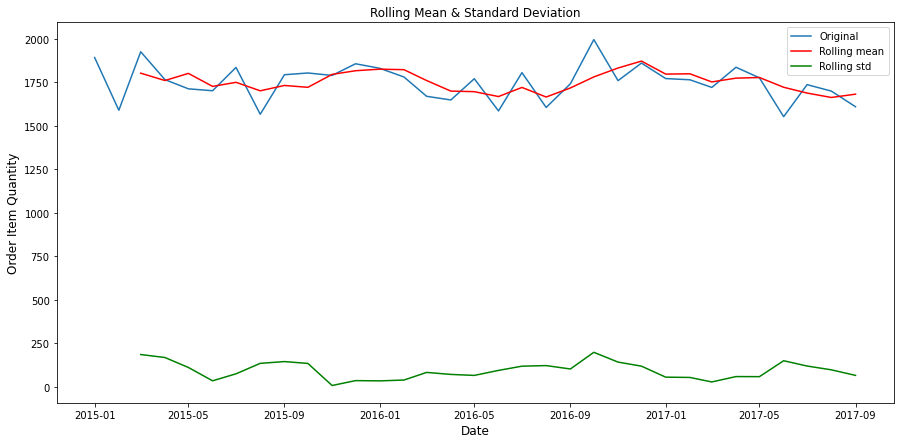

In [111]:
plt.figure(figsize=(15,7))
plt.plot(Monthly_Quantity["Order Item Quantity"], label='Original')
plt.plot(Monthly_Quantity["Order Item Quantity"].rolling(window=3).mean(), color='red', label='Rolling mean')
plt.plot(Monthly_Quantity["Order Item Quantity"].rolling(window=3).std(), color='green', label='Rolling std')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Order Item Quantity', fontsize=12)
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

In [112]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima.model import ARIMA
%matplotlib inline

### TEST for checking the stationarity of Data

In [113]:
adf_test = adfuller(Monthly_Quantity)
print(f'p-value: {adf_test[1]}')

p-value: 0.011869758676549954


Since the p-value is less than 0.05, it means data is stationary

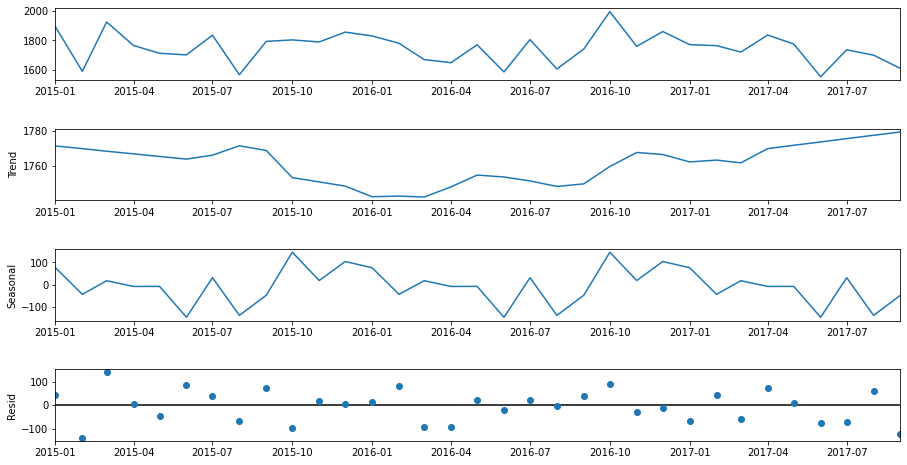

In [114]:
def seasonal_decompose (Monthly_Quantity):
    decomposition = sm.tsa.seasonal_decompose(Monthly_Quantity, model='additive', extrapolate_trend=12)
    
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    fig = decomposition.plot()
    fig.set_size_inches(14, 7)
    plt.show()
    
    return trend, seasonal, residual
 
trend, seasonal, residual = seasonal_decompose(Monthly_Quantity)

Text(0.5, 1.0, 'Daily_Sales')

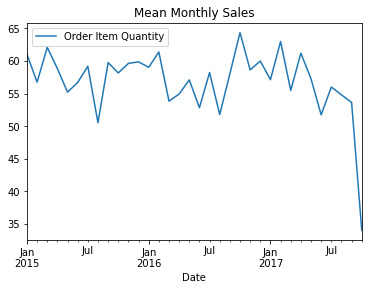

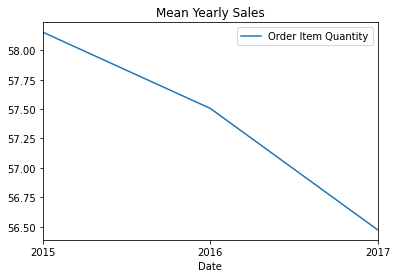

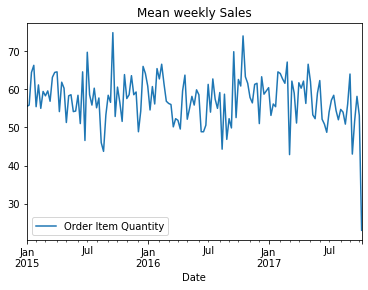

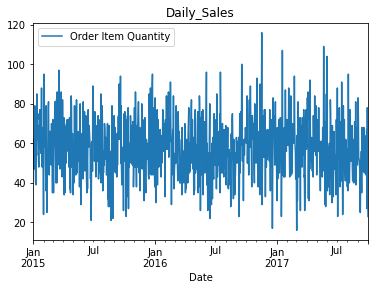

In [115]:

sales_agg_monthly = Indoor_Outdoor_Games_Sold.resample("M")[["Order Item Quantity"]].mean()
sales_agg_monthly.plot()
plt.title('Mean Monthly Sales')

sales_agg_yearly = Indoor_Outdoor_Games_Sold.resample("Y")[["Order Item Quantity"]].mean()
sales_agg_yearly.plot()
plt.title('Mean Yearly Sales')

sales_agg_weekly = Indoor_Outdoor_Games_Sold.resample("W")[["Order Item Quantity"]].mean()
sales_agg_weekly.plot()
plt.title('Mean weekly Sales')

sales_agg_daily = Indoor_Outdoor_Games_Sold.resample("D")[["Order Item Quantity"]].mean()
sales_agg_daily.plot()
plt.title('Daily_Sales')

In [116]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 92.7 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [117]:
from pmdarima import auto_arima

Adding Exogenous Variable


In [118]:
Monthly_Discount.drop(Monthly_Discount.tail(1).index,inplace=True)
Monthly_Discount.shape


(33, 1)

In [119]:
Exog = Monthly_Discount[['Order Item Discount']].to_numpy()

In [120]:


# Split the data into training and test sets
train_data = Monthly_Quantity[:int(0.8*len(Monthly_Quantity))]
test_data = Monthly_Quantity[int(0.8*len(Monthly_Quantity)):]

# Create an auto_arima model
model = auto_arima(train_data, exogenous=Exog, start_p=1, start_q=1,
                   max_p=5, max_q=5, m=1, d=None, 
                    trace=True,
                   error_action='ignore',  # don't want to know if an order does not work
                   suppress_warnings=True,  # don't want convergence warnings
                   stepwise=True)  # set to stepwise

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=322.573, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=319.594, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=319.983, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=320.382, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=464.530, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.185 seconds


In [121]:

# Fit the model to the training data
model.fit(train_data)

# Make predictions on the test data
predictions = model.predict(n_periods=len(test_data))

In [122]:
predictions

2017-03-01    1761.846154
2017-04-01    1761.846154
2017-05-01    1761.846154
2017-06-01    1761.846154
2017-07-01    1761.846154
2017-08-01    1761.846154
2017-09-01    1761.846154
Freq: MS, dtype: float64

Evaluate the model's performance

In [123]:
MAE = (mean_absolute_error(predictions,test_data))
print(MAE)

82.93406593406563


In [124]:
rmse = sqrt(mean_squared_error(test_data, predictions))
print(f' Root Mean Squared Error: {rmse:.3f}')

 Root Mean Squared Error: 106.528


In [125]:
MAPE = (mean_absolute_percentage_error(test_data, predictions))*100
print("MAPE:", MAPE)

MAPE: 5.060166524955935


# ARIMA PREDICTION

In [143]:
Arima_prediction2 = predictions.iloc[1:2]
Arima_prediction2 = Arima_prediction2.tolist()
print(Arima_prediction2)
print(Actual_value2)

[1761.8461538461531]
24    1836
Name: Order Item Quantity, dtype: int64


In [144]:
print("\tMean absolute error (MAE):", mean_absolute_error(Actual_value2, Arima_prediction2))

	Mean absolute error (MAE): 74.15384615384687


#Exponential Smoothing

In [127]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [128]:
def simple_exponential_smoothing(MonthlyItemQuantity, alpha):
    """
    Perform simple exponential smoothing.
    Args:
        series: input series
        alpha: smoothing factor (between 0 and 1)
    Returns:
        smoothed series
    """
    # Initialize the smoothed series with the first value of the input series
    smoothed_series = [MonthlyItemQuantity[0]]
    # Loop through the rest of the series
    for t in range(1, len(MonthlyItemQuantity)):
        # Calculate the smoothed value for time t
        smoothed_series.append(alpha * MonthlyItemQuantity[t] + (1 - alpha) * smoothed_series[t-1])
    return smoothed_series

In [129]:
alpha = 0.7

smoothed_series = simple_exponential_smoothing(MonthlyItemQuantity, alpha)
print(smoothed_series)

[1765, 1727.9, 1709.07, 1797.221, 1635.3663, 1745.70989, 1785.8129669999998, 1788.0438901, 1835.6131670299999, 1831.683950109, 1795.5051850327, 1706.95155550981, 1665.685466652943, 1738.7056399958828, 1631.1116919987649, 1752.8335075996295, 1649.350052279889, 1713.5050156839666, 1910.55150470519, 1804.465451411557, 1843.3396354234674, 1792.70189062704, 1772.610567188112, 1735.7831701564337, 1805.93495104693, 1784.2804853140792, 1621.6841455942235, 1701.705243678267, 1699.81157310348, 1636.243471931044]


In [130]:
errors = []
for a, f in zip(MonthlyItemQuantity, smoothed_series):
    errors.append(a - f)

# Calculate the MSE
mse = np.sum(np.square(errors)) / len(errors)

# Calculate the RMSE
rmse = np.sqrt(mse)

print("Errors:", errors)
print("RMSE:", rmse)

MAE = (mean_absolute_error(smoothed_series,MonthlyItemQuantity))
print("MAE:", MAE)

MAPE = (mean_absolute_percentage_error(smoothed_series, MonthlyItemQuantity))*100
print("MAPE:", MAPE)


Errors: [0, -15.900000000000091, -8.069999999999936, 37.778999999999996, -69.36629999999991, 47.29010999999991, 17.187033000000156, 0.9561099000000013, 20.386832970000114, -1.6839501090000795, -15.505185032699956, -37.95155550981008, -17.685466652942978, 31.294360004117152, -46.111691998764854, 52.166492400370544, -44.35005227988904, 27.494984316033424, 84.44849529481007, -45.46545141155707, 16.66036457653263, -21.70189062704003, -8.6105671881121, -15.783170156433698, 30.06504895306989, -9.280485314079215, -69.68414559422354, 34.294756321733075, -0.8115731034799865, -27.24347193104404]
RMSE: 35.6308505474219
MAE: 28.50761815485812
MAPE: 1.6455944049280409


# Exponential Smoothing PREDICTION

In [131]:
Monthly_Quantity.shape


(33, 1)

In [132]:
train_data = Monthly_Quantity[:int(0.8*len(Monthly_Quantity))]
test_data = Monthly_Quantity[int(0.8*len(Monthly_Quantity)):]

In [133]:
alpha = 0.7

In [134]:
model = SimpleExpSmoothing(train_data['Order Item Quantity'])
fit = model.fit(smoothing_level=alpha)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  # If an index is available, see if it is a date-based index or if it


In [135]:
ES_predictions2 = fit.predict(start=test_data.index[0], end=test_data.index[-1])

In [136]:
ES_prediction2 = ES_predictions2.iloc[1:2]
ES_prediction2 = ES_prediction2.tolist()
ES_prediction2

[1772.610567188192]

In [137]:
print("\tMean absolute error (MAE):", mean_absolute_error(Actual_value2, ES_prediction2))

	Mean absolute error (MAE): 63.38943281180809


# COMBINING PREDICTION OF THE 5 MODELS

In [138]:
df_vertical = pd.concat([xgboost_prediction2, linear_prediction2, Forest_prediction2])

In [139]:
array = df_vertical.values
array

array([[1842.43933105],
       [1842.95941584],
       [1824.53      ]])

In [140]:
array = np.append(array, Arima_prediction2)
print(array)

[1842.43933105 1842.95941584 1824.53       1761.84615385]


# INPUT FOR Multilayer perceptron

In [141]:
input_array = np.append(array, ES_prediction2)
print(input_array)

[1842.43933105 1842.95941584 1824.53       1761.84615385 1772.61056719]


In [177]:
Actual_value2

24    1836
Name: Order Item Quantity, dtype: int64

# FINAL OUTPUT

Implement multilayer perceptron to get the final forecast for Indoor Outdoor Games Category

In [156]:
input = input_array

In [157]:
input


array([1842.43933105, 1842.95941584, 1824.53      , 1761.84615385,
       1772.61056719])

In [671]:
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        self.input_size = input_size
        self.hidden_size_1 = hidden_size_1
        self.hidden_size_2 = hidden_size_2
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden_1 = np.random.randn(self.input_size, self.hidden_size_1)
        self.biases_input_hidden_1 = np.zeros(self.hidden_size_1)
        self.weights_hidden_1_hidden_2 = np.random.randn(self.hidden_size_1, self.hidden_size_2)
        self.biases_hidden_1_hidden_2 = np.zeros(self.hidden_size_2)
        self.weights_hidden_2_output = np.random.randn(self.hidden_size_2, self.output_size)
        self.biases_hidden_2_output = np.zeros(self.output_size)

    def forward(self, input):
        # Propagate input through the network
        self.hidden_1 = np.dot(input, self.weights_input_hidden_1) + self.biases_input_hidden_1
        self.hidden_2 = np.dot(self.hidden_1, self.weights_hidden_1_hidden_2) + self.biases_hidden_1_hidden_2
        self.output = np.dot(self.hidden_2, self.weights_hidden_2_output) + self.biases_hidden_2_output
        return self.output

# Create an MLP with 5 inputs,


# Create an MLP with 5 inputs, 2 hidden layers, and 1 output
mlp = MLP(5, 4, 3, 1)

# Propagate some input through the network and print the output
input = input_array
output = mlp.forward(input)
print(output)




[1815.12273728]


# Calculate Error for final Output

In [672]:
print("\tMean absolute error (MAE):", mean_absolute_error(Actual_value2, output))

	Mean absolute error (MAE): 20.877262718590373
